# Chapter 4

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 10 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.xmargin'] = '0' #'.05'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

## 伝達関数モデルのステップ応答

### 1次遅れ系

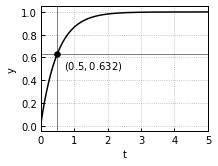

In [5]:
def cross_lines(x, y, **kwargs):
    ax = plt.gca()
    ax.axhline(y, **kwargs)
    ax.axvline(x, **kwargs)
    ax.scatter(T, 0.632, **kwargs)

fig, ax = plt.subplots(figsize=(3, 2.3))

(T, K) = (0.5, 1)
P = tf([0, K], [T, 1])
y, t = step(P, np.arange(0, 5, 0.01))
ax.plot(t,y, color='k')

cross_lines(T, 0.632, color='k',lw=0.5)
ax.annotate('$(0.5, 0.632)$', xy=(0.7, 0.5))

ax.set_xticks(np.linspace(0, 5, 6))
plot_set(ax, 't', 'y')

# fig.savefig("1st_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.1)

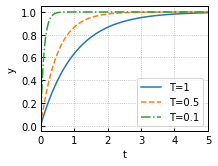

In [6]:
fig, ax = plt.subplots(figsize=(3, 2.3))
LS = linestyle_generator()

K = 1
T = (1, 0.5, 0.1)
for i in range(len(T)):
    y, t = step(tf([0, K], [T[i], 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, ls = next(LS), label='T='+str(T[i]))


ax.set_xticks(np.linspace(0, 5, 6))
ax.set_yticks(np.linspace(0, 1, 6))
plot_set(ax, 't', 'y', 'best')

# fig.savefig("1st_step1.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

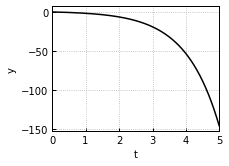

In [7]:
fig, ax = plt.subplots(figsize=(3, 2.3))

T, K = -1, 1
y, t = step(tf([0, K], [T, 1]), np.arange(0, 5, 0.01))
ax.plot(t, y, color='k')

ax.set_xticks(np.arange(0, 5.2, step=1.0))
plot_set(ax, 't', 'y')

#fig.savefig("1st_unstable.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

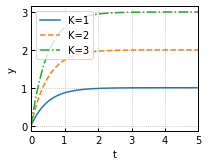

In [8]:
fig, ax = plt.subplots(figsize=(3, 2.3))

LS = linestyle_generator()

T = 0.5
K = [1, 2, 3]
for i in range(len(K)):
    y, t = step(tf([0, K[i]], [T, 1]), np.arange(0, 5, 0.01))
    ax.plot(t,y,ls=next(LS), label='K='+str(K[i]))

ax.set_xticks(np.arange(0, 5.2, step=1.0))
ax.set_yticks(np.arange(0, 3.2, step=1))
plot_set(ax, 't', 'y', 'upper left')

# fig.savefig("1st_step2.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 2次遅れ系

ymax= 1.2538267219801087
Tp= 0.6855517208472576


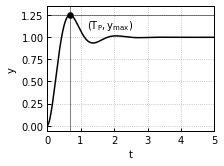

In [9]:
def cross_lines(x, y, **kwargs):
    plt.gca()
    ax.axhline(y, **kwargs)
    ax.axvline(x, **kwargs)
    ax.scatter(x, y, **kwargs)
    
(zeta, omega_n) = (0.4, 5)

fig, ax = plt.subplots(figsize=(3, 2.3))

P = tf([0,omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
y, t = step(P, np.arange(0,5,0.01))
ax.plot(t,y, color='k')

ymax = 1 + 1 * np.exp(-(np.pi*zeta)/np.sqrt(1-zeta**2))
Tp = np.pi/omega_n/np.sqrt(1-zeta**2)
cross_lines(Tp, ymax, color='k',lw=0.5)

ax.annotate('$(T_P, y_{max})$', xy=(1.2, 1.1))

print('ymax=',ymax)
print('Tp=', Tp)

ax.set_xticks(np.arange(0, 5.2, step=1.0))
ax.set_yticks(np.arange(0, 1.3, step=0.25))
plot_set(ax, 't', 'y')

# fig.savefig("2nd_step0.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

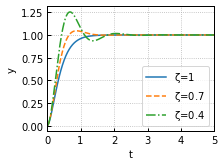

In [10]:
fig, ax = plt.subplots(figsize=(3, 2.3))

LS = linestyle_generator()

zeta = [1, 0.7, 0.4]
omega_n = 5
for i in range(len(zeta)):
    P = tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = step(P, np.arange(0, 5, 0.01))
    
    pltargs = {'ls': next(LS), 'label': '$\zeta$='+str(zeta[i]) }
    ax.plot(t, y, **pltargs)

ax.set_xticks(np.arange(0, 5.2, step=1.0))
ax.set_yticks(np.arange(0, 1.3, step=0.25))
plot_set(ax, 't', 'y', 'best')    
    
# fig.savefig("2nd_step1.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

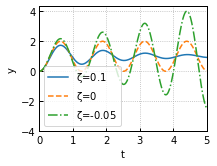

In [11]:
fig, ax = plt.subplots(figsize=(3, 2.3))

LS = linestyle_generator()

zeta = [0.1, 0, -0.05]
omega_n = 5
for i in range(len(zeta)):
    P = tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = step(P, np.arange(0, 5, 0.01))
    
    pltargs = {'ls': next(LS), 'label': '$\zeta$='+str(zeta[i])}
    ax.plot(t, y, **pltargs)
 
ax.set_xticks(np.arange(0, 5.2, step=1.0))
ax.set_yticks(np.arange(-4, 5, step=2))

plot_set(ax, 't', 'y', 'lower left')

# fig.savefig("2nd_step2.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

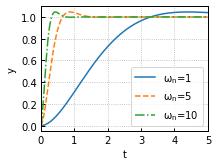

In [12]:
fig, ax = plt.subplots(figsize=(3, 2.3))

LS = linestyle_generator()

zeta = 0.7
omega_n = [1, 5, 10]
for i in range(len(omega_n)):
    P = tf([0, omega_n[i]**2], [1, 2*zeta*omega_n[i], omega_n[i]**2])
    y, t = step(P, np.arange(0, 5, 0.01))
    
    pltargs = {'ls': next(LS)}
    pltargs['label'] = '$\omega_n$='+str(omega_n[i])
    ax.plot(t, y, **pltargs)

ax.set_xticks(np.arange(0, 5.2, step=1.0))
plot_set(ax, 't', 'y', 'best')

# fig.savefig("2nd_step3.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## ステップ応答の計算

In [13]:
import sympy as sp
sp.init_printing()
s = sp.Symbol('s')
T = sp.Symbol('T', real=True)
P = 1/((1+T*s)*s)
sp.apart(P, s)

In [14]:
t = sp.Symbol('t', positive=True)
sp.inverse_laplace_transform(1/s-1/(s+1/T), s, t)

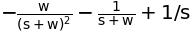

In [15]:
w = sp.Symbol('w', real=True)
P = w**2/(s*(s+w)**2)
sp.apart(P, s)

In [16]:
P = sp.apart(w**2/s/(s+w)**2, s)
Pt = sp.inverse_laplace_transform(P, s, t)
sp.expand(Pt)

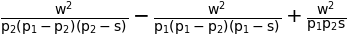

In [17]:
p1= sp.Symbol('p1', real=True)
p2= sp.Symbol('p2', real=True)
P = w**2/(s*(s-p1)*(s-p2))
sp.apart(P, s)

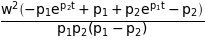

In [18]:
sp.inverse_laplace_transform(P, s, t)

## 練習問題


    s + 3
-------------
s^2 + 3 s + 2



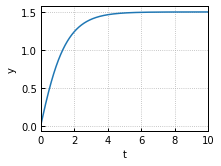

In [19]:
P1 = tf([1, 3], [1, 3, 2])
print(P1)

fig, ax = plt.subplots(figsize=(3, 2.3))
y, t = step(P1, np.arange(0, 10, 0.01))
    
ax.plot(t, y)
plot_set(ax, 't', 'y')


          1
---------------------
s^3 + 2 s^2 + 2 s + 1



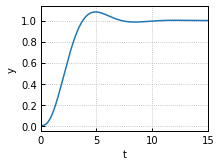

In [20]:
P2 = tf([0, 1], [1, 2, 2, 1])
print(P2)

fig, ax = plt.subplots(figsize=(3, 2.3))
y, t = step(P2, np.arange(0, 15, 0.01))
    
ax.plot(t, y)
plot_set(ax, 't', 'y')

## 状態空間モデルの時間応答

In [21]:
A = [[0, 1],[-4, -5]]
B = [[0], [1]]
C = np.eye(2)
D = np.zeros([2, 1])
P = ss(A, B, C, D)

In [22]:
print(np.linalg.eigvals(P.A))

[-1. -4.]


### 零入力応答

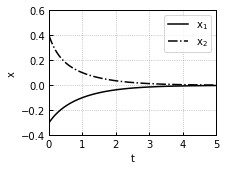

In [23]:
Td = np.arange(0, 5, 0.01)
X0 = [-0.3, 0.4]
x, t = initial(P, Td, X0) #ゼロ入力応答

fig, ax = plt.subplots(figsize=(3, 2.3))
ax.plot(t, x[:,0], label = '$x_1$', color='k')
ax.plot(t, x[:,1], ls = '-.', label = '$x_2$', color='k')

ax.set_xticks(np.linspace(0, 5, 6))
ax.set_yticks(np.linspace(-0.4, 0.6, 6))
plot_set(ax, 't', 'x', 'best')

#fig.savefig("res_ss_initial.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 行列指数関数の計算

In [24]:
import sympy as sp
import numpy as np
sp.init_printing()

A = np.array([[0, 1],[-4, -5]])

s = sp.Symbol('s')
t = sp.Symbol('t', positive=True)
G = s*sp.eye(2)-A

exp_At = sp.inverse_laplace_transform(sp.simplify(G.inv()), s, t)
exp_At

⎡ ⎛   3⋅t    ⎞  -4⋅t    ⎛ 3⋅t    ⎞  -4⋅t ⎤
⎢ ⎝4⋅ℯ    - 1⎠⋅ℯ        ⎝ℯ    - 1⎠⋅ℯ     ⎥
⎢ ──────────────────    ──────────────── ⎥
⎢         3                    3         ⎥
⎢                                        ⎥
⎢  ⎛   3⋅t    ⎞  -4⋅t  ⎛   3⋅t    ⎞  -4⋅t⎥
⎢4⋅⎝- ℯ    + 1⎠⋅ℯ      ⎝- ℯ    + 4⎠⋅ℯ    ⎥
⎢────────────────────  ──────────────────⎥
⎣         3                    3         ⎦

In [25]:
exp_At.subs(sp.exp(-t), np.exp(-5))

⎡0.00898392864506275   0.00224598164597728 ⎤
⎢                                          ⎥
⎣-0.00898392658390913  -0.00224597958482366⎦

In [26]:
import scipy
A = np.array([[0, 1],[-4, -5]])
t = 5
scipy.linalg.expm(A*t)

array([[ 0.00898393,  0.00224598],
       [-0.00898393, -0.00224598]])

### 零状態応答

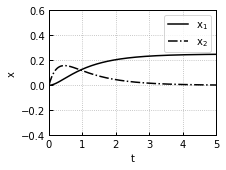

In [27]:
Td = np.arange(0, 5, 0.01)
Ud = 1*(Td>0) #ステップ入力

# yst, tst, x0st = lsim(P, udata, tdata) #ゼロ状態応答
x, t = step(P, Td) #ゼロ状態応答

fig, ax = plt.subplots(figsize=(3, 2.3))
ax.plot(t, x[:,0], label = '$x_1$', color='k')
ax.plot(t, x[:,1], ls = '-.', label = '$x_2$', color='k')

ax.set_xticks(np.linspace(0, 5, 6))
ax.set_yticks(np.linspace(-0.4, 0.6, 6))
plot_set(ax, 't', 'x', 'best')

#fig.savefig("res_ss_zero.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 完全応答

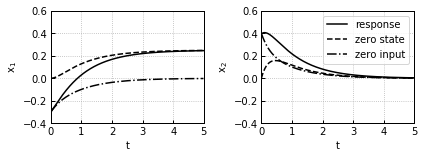

In [28]:
Td = np.arange(0, 5, 0.01)
Ud = 1*(Td>0)
X0 = [-0.3, 0.4]

xst, t = step(P, Td) #ゼロ状態応答
xin, _ = initial(P, Td, X0) #ゼロ入力応答
x, _, _ = lsim(P, Ud, Td, X0) 

fig, ax = plt.subplots(1, 2, figsize=(6, 2.3)) 

for i in [0, 1]:
    ax[i].plot(t, x[:,i], label='response', color='k')
    ax[i].plot(t, xst[:,i], ls='--', label='zero state', color='k')
    ax[i].plot(t, xin[:,i], ls='-.', label='zero input', color='k')
    ax[i].set_xticks(np.linspace(0, 5, 6))
    ax[i].set_yticks(np.linspace(-0.4, 0.6, 6))


plot_set(ax[0], 't', '$x_1$')
plot_set(ax[1], 't', '$x_2$', 'best')

fig.tight_layout()
# fig.savefig("res_ss.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 練習問題

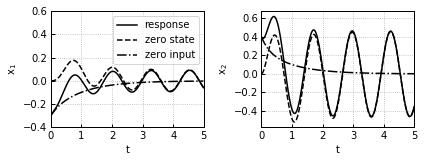

In [29]:
Td = np.arange(0, 5, 0.01)
Ud = 3*np.sin(5*Td)
X0 = [0.5, 1]

xst, tst, x0st = lsim(P, Ud, Td, [0, 0]) #ゼロ状態応答
xin, tin = initial(P, Td, [-0.3, 0.4]) #ゼロ入力応答
x, t, x0= lsim(P, Ud, Td, [-0.3, 0.4]) # y + yin

fig, ax = plt.subplots(1, 2, figsize=(6, 2.35)) 

for i in [0, 1]:

    ax[i].plot(t, x[:,i], label='response', color='k')
    ax[i].plot(tst, xst[:,i], ls='--',label='zero state', color='k')
    ax[i].plot(tin, xin[:,i], ls='-.', label ='zero input', color='k')
    ax[i].set_xticks(np.linspace(0, 5, 6))
    ax[i].set_yticks(np.linspace(-0.4, 0.6, 6))

plot_set(ax[0], 't', '$x_1$', 'best')
plot_set(ax[1], 't', '$x_2$')

fig.tight_layout()
#fig.savefig("res_ss_sin.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 安定性

### 極

In [30]:
P1 = tf([0,1],[1, 1])
print('P1:', pole(P1))
P2 = tf([0,1],[-1, 1])
print('P2:', pole(P2))
P3 = tf([0,1],[1, 0.05, 1])
print('P3:', pole(P3))
P4 = tf([0,1],[1, -0.05, 1])
print('P4:', pole(P4))

P1: [-1.]
P2: [1.]
P3: [-0.025+0.99968745j -0.025-0.99968745j]
P4: [0.025+0.99968745j 0.025-0.99968745j]


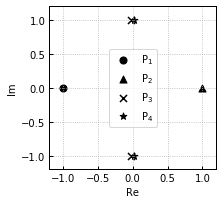

In [31]:
fig, ax = plt.subplots(figsize=(3, 3))

P1pole = pole(P1)
P2pole = pole(P2)
P3pole = pole(P3)
P4pole = pole(P4)
ax.scatter(P1pole.real, P1pole.imag, s=50, marker='o',label='$P_1$', color='k')
ax.scatter(P2pole.real, P2pole.imag, s=50, marker='^',label='$P_2$', color='k')
ax.scatter(P3pole.real, P3pole.imag, s=50, marker='x',label='$P_3$', color='k')
ax.scatter(P4pole.real, P4pole.imag, s=50, marker='*',label='$P_4$', color='k')

ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
plot_set(ax, 'Re', 'Im', 'best')


#fig.savefig("pole_map.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [32]:
_, [[Dp]] = tfdata(P4)
print(Dp)
print(np.roots(Dp))

[ 1.   -0.05  1.  ]
[0.025+0.99968745j 0.025-0.99968745j]


### 位相面図

固有値= [-1. -4.]


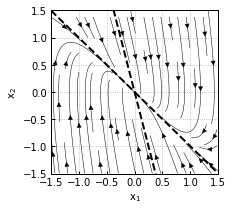

In [33]:
import numpy as np
import matplotlib.pyplot as plt

w = 1.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

A = np.array( [[0, 1],[-4, -5]] )
s,v = np.linalg.eig(A)
    
print('固有値=',s)
U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

t = np.arange(-1.5, 1.5, 0.01)

fig, ax = plt.subplots(figsize=(3, 3))

# 固有空間のプロット
if s.imag[0] == 0 and s.imag[1] == 0: #固有値が複素数の場合はプロットできない
    ax.plot(t, (v[1,0]/v[0,0])*t, ls='--', color='k', lw=2)
    ax.plot(t, (v[1,1]/v[0,1])*t, ls='--', color='k', lw=2)
    
ax.streamplot(X, Y, U, V, density=0.7, color='k', linewidth=0.5)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xticks(np.arange(-1.5, 1.51, step=0.5))
ax.set_yticks(np.arange(-1.5, 1.51, step=0.5))
plot_set(ax, '$x_1$', '$x_2$')

# fig.savefig("trajectory.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

固有値= [1. 4.]


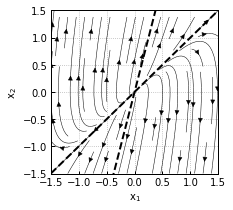

In [34]:
w = 1.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

A = np.array( [[0, 1],[-4, 5]] )
s,v = np.linalg.eig(A)
    
print('固有値=',s)
U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

t = np.arange(-1.5, 1.5, 0.01)

fig, ax = plt.subplots(figsize=(3, 3))

# 固有空間のプロット
if s.imag[0] == 0 and s.imag[1] == 0: #固有値が複素数の場合はプロットできない
    ax.plot(t, (v[1,0]/v[0,0])*t, ls='--', color='k', lw=2)
    ax.plot(t, (v[1,1]/v[0,1])*t, ls='--', color='k', lw=2)
    
ax.streamplot(X, Y, U, V, density=0.7, color='k', linewidth=0.5)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xticks(np.arange(-1.5, 1.51, step=0.5))
ax.set_yticks(np.arange(-1.5, 1.51, step=0.5))
plot_set(ax, '$x_1$', '$x_2$')

#fig.savefig("trajectory2.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

固有値= [-0.70156212  5.70156212]


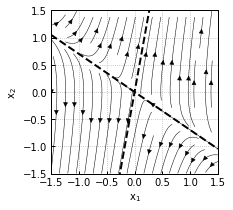

In [35]:
w = 1.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

A = np.array( [[0, 1],[4, 5]] )
s,v = np.linalg.eig(A)
    
print('固有値=',s)
U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

t = np.arange(-1.5, 1.5, 0.01)

fig, ax = plt.subplots(figsize=(3, 3))

# 固有空間のプロット
if s.imag[0] == 0 and s.imag[1] == 0: #固有値が複素数の場合はプロットできない
    ax.plot(t, (v[1,0]/v[0,0])*t, ls='--', color='k', lw=2)
    ax.plot(t, (v[1,1]/v[0,1])*t, ls='--', color='k', lw=2)
    
ax.streamplot(X, Y, U, V, density=0.7, color='k', linewidth=0.5)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xticks(np.arange(-1.5, 1.51, step=0.5))
ax.set_yticks(np.arange(-1.5, 1.51, step=0.5))
plot_set(ax, '$x_1$', '$x_2$')

### 零点の影響

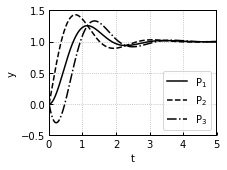

In [36]:
fig, ax = plt.subplots(figsize=(3, 2.3))

Td = np.arange(0,5,0.01)
Ud = 1 * (Td > 0.0)

zeta = .4
omega_n = 3

LS=linestyle_generator()

P = tf([ 0, omega_n**2],[1, 2*zeta*omega_n, omega_n**2])
y, t, x0 = lsim(P, Ud, Td, 0)
ax.plot(t,y, ls = next(LS), label='$P_1$', c='k')

P = tf([ 3, omega_n**2],[1, 2*zeta*omega_n, omega_n**2])
y, t, x0 = lsim(P, Ud, Td, 0)
ax.plot(t,y,ls = next(LS), label='$P_2$', c='k')

P = tf([-3, omega_n**2],[1, 2*zeta*omega_n, omega_n**2])
y, t, x0 = lsim(P, Ud, Td, 0)
ax.plot(t,y, ls = next(LS), label='$P_3$', c='k')

ax.set_ylim(-0.5,1.5)
plot_set(ax, 't', 'y', 'best')

# fig.savefig("fig_step6.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 周波数応答

### インパルスは余弦波の重ね合わせ

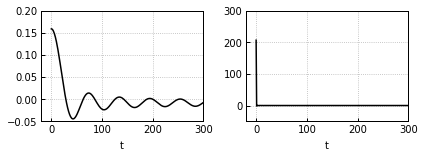

In [37]:
t = np.arange(0, 3, 0.01)

fig, ax = plt.subplots(1, 2, figsize=(6, 2.3)) 

u = 0 * t
for i in range(0,10):
#     ax[0].plot((0.1/2/np.pi)*np.cos(t * (i+1)), c = 'k', lw = 0.2)
    u = u + (0.1/2/np.pi)*np.cos(t * (i+1))
ax[0].plot(u, color='k')

u = 0 * t
for i in range(0,13000):
#     ax[1].plot((0.1/2/np.pi)*np.cos(t * (i+1)), c = 'k', lw = 0.2)
    u = u + (0.1/2/np.pi)*np.cos(t * (i+1))
ax[1].plot(u, color='k')

ax[0].set_xlim(-20, 300)
ax[0].set_ylim(-0.05, 0.2)
ax[0].grid(ls=':')

ax[1].set_xlim(-20, 300)
ax[1].set_ylim(-50, 300)
ax[1].grid(ls=':')

ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')

fig.tight_layout()
#fig.savefig("impluse_cos.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

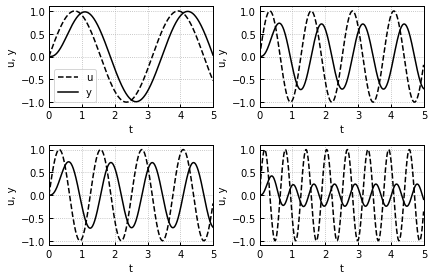

In [38]:
fig, ax = plt.subplots(2,2,figsize=(6,4)) 

zeta = 0.7
omega_n = 5
P = tf([0,omega_n**2],[1, 2*zeta*omega_n, omega_n**2])

freq = [2, 5, 10, 20]
Td = np.arange(0, 5, 0.01)
for i in range(2):
    for j in range(2):
        u = np.sin(freq[i+j]*Td)
        y, t, x0 = lsim(P, u, Td, 0)
    
        ax[i,j].plot(t, u, ls='--', label='u', color='k')
        ax[i,j].plot(t, y, label='y', color='k')
        plot_set(ax[i,j], 't', 'u, y')

ax[0,0].legend()
fig.tight_layout()
#fig.savefig("freq_resp.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 1次遅れ系のボード線図

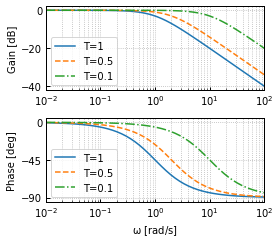

In [39]:
LS = linestyle_generator()

K = 1
T = [1, 0.5, 0.1]

fig, ax = plt.subplots(2,1,figsize=(4,3.5))

for i in range(len(T)):
    P = tf([0, K],[T[i], 1])
    gain, phase, w = bode(P, logspace(-2,2), Plot=False)
    
    pltargs = {'ls': next(LS), 'label': 'T='+str(T[i])}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
 
bodeplot_set(ax, 3, 3)
ax[1].set_ylim(-95,5)
ax[1].set_yticks([-90,-45,0])

fig.tight_layout()\
# fig.savefig("1st_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 2次遅れ系のボード線図

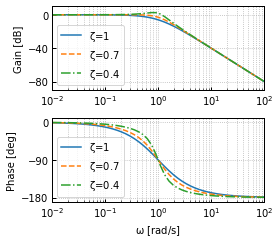

In [40]:
LS = linestyle_generator()

fig, ax = plt.subplots(2,1,figsize=(4,3.5))

zeta = [1, 0.7, 0.4]
omega_n = 1

for i in range(len(T)):
    P = tf([0,omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    gain, phase, w = bode(P, logspace(-2,2), Plot=False)
    
    pltargs = {'ls': next(LS)}
    pltargs['label'] = '$\zeta$='+str(zeta[i])
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)

bodeplot_set(ax, 3, 3)
ax[0].set_ylim(-90,10)
ax[0].set_yticks([-80,-40,0])
ax[1].set_ylim(-190,10)
ax[1].set_yticks([-180,-90,0])

fig.tight_layout()
# fig.savefig("2nd_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

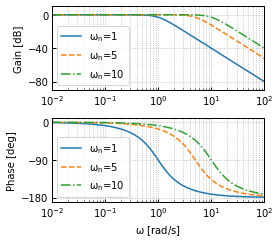

In [41]:
LS = linestyle_generator()

fig, ax = plt.subplots(2,1,figsize=(4,3.5))

zeta = 0.7
omega_n = (1, 5, 10)
for i in range(len(T)):
    P = tf([0,omega_n[i]**2],[1, 2*zeta*omega_n[i], omega_n[i]**2])
    gain, phase, w = bode(P, logspace(-2,2), Plot=False)

    pltargs = {'ls': next(LS), 'label': '$\omega_n$='+str(omega_n[i])}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
   
bodeplot_set(ax, 3, 3)
ax[0].set_ylim(-90,10)
ax[0].set_yticks([-80,-40,0])
ax[1].set_ylim(-190,10)
ax[1].set_yticks([-180,-90,0])

fig.tight_layout()
#fig.savefig("2nd_bode2.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 練習問題


    s + 3
-------------
s^2 + 3 s + 2



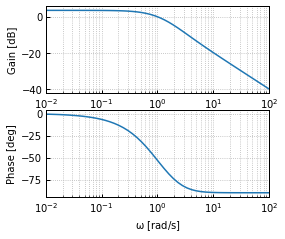

In [42]:
fig, ax = plt.subplots(2,1,figsize=(4,3.5))

P1 = tf([1, 3], [1, 3, 2])
print(P1)

gain, phase, w = bode(P1, logspace(-2,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)
bodeplot_set(ax)


          1
---------------------
s^3 + 2 s^2 + 2 s + 1



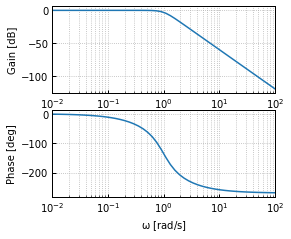

In [43]:
fig, ax = plt.subplots(2,1,figsize=(4,3.5))

P2 = tf([0, 1], [1, 2, 2, 1])
print(P2)

gain, phase, w = bode(P2, logspace(-2,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)
bodeplot_set(ax)

## 安定判別

In [44]:
P = tf([0,1],[1, 2, 3, 4, 5])
print('P:',pole(P))

P: [-1.28781548+0.85789676j -1.28781548-0.85789676j  0.28781548+1.41609308j
  0.28781548-1.41609308j]


In [45]:
_, [[Dp]] = tfdata(P)
print(Dp)
print(np.roots(Dp))

[1 2 3 4 5]
[-1.28781548+0.85789676j -1.28781548-0.85789676j  0.28781548+1.41609308j
  0.28781548-1.41609308j]
